**Multilayer perceptron (MLP)**
An Artificial Neural Network with interconnected perceptron layers.

Upload the Given data file in Google collab

In [1]:
from google.colab import files
import pandas as pd

# Upload the given CSV file
uploaded = files.upload()

# Read the CSV file without header
import io
data = pd.read_csv(io.BytesIO(uploaded['MLoGPU_data1_train.csv']), header=None)

# Display basic information about the dataset
print("Shape of the dataset:", data.shape)
print(data.head())

Saving MLoGPU_data1_train.csv to MLoGPU_data1_train.csv
Shape of the dataset: (4000, 11)
         0         1         2         3         4         5         6   \
0  0.233449  0.166667  0.381818  0.424594  0.164110  0.354839  0.250000   
1  0.160279  0.196078  0.263636  0.262181  0.176380  0.161290  0.346154   
2  0.083624  0.156863  0.300000  0.396752  0.191718  0.177419  0.355769   
3  0.097561  0.107843  0.390909  0.201856  0.019939  0.451613  0.288462   
4  0.073171  0.411765  0.445455  0.271462  0.007669  0.467742  0.413462   

         7         8         9    10  
0  0.325581  0.166184  0.192771  6.0  
1  0.255814  0.196453  0.301205  5.0  
2  0.360465  0.226141  0.186747  6.0  
3  0.372093  0.088490  0.216867  7.0  
4  0.232558  0.128976  0.283133  5.0  


Import Important Libraries

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time
import matplotlib.pyplot as plt

*Load the Dataset
*Separate the features, labels
*Normalize features
*Split the dataset into training and testing dataset
*Convert data to PyTorch tensors
*Define Model Parameters
**Two hidden layers are taken**



In [25]:
# Load the dataset
data = pd.read_csv("MLoGPU_data1_train.csv", header=None)

# Separate features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalize the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define model parameters
batch_size = 64  # Batch size defined
input_size = 10  # number of input features
hidden_size1 = 64  # Number of units in the first hidden layer (adjusted for experiments)
hidden_size2 = 128  # Number of units in the second hidden layer (adjusted for experiments)
num_classes = 10  # number of output classes
learning_rate = 0.001  # learning rate for optimization
num_epochs = 50  # the number of training epochs


Define the model for MLP


*   Two hidden Layers Taken
*   PyTorch Tensors are X_train_tensor and y_train_tensor



In [26]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Initialize model, criterion, and optimizer for CPU
model_cpu = MLP(input_size, hidden_size1, hidden_size2, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cpu.parameters(), lr=learning_rate)

# store the loss values in a list for plotting
train_losses_cpu = []

# X_train_tensor and y_train_tensor are PyTorch tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

######################################
####### Training for CPU and Evaluation ########
######################################

CPU - Epoch [1/50], Loss: 1.7338, Epoch Time: 0.10 seconds
CPU - Epoch [2/50], Loss: 1.2919, Epoch Time: 0.10 seconds
CPU - Epoch [3/50], Loss: 1.2153, Epoch Time: 0.09 seconds
CPU - Epoch [4/50], Loss: 1.1728, Epoch Time: 0.10 seconds
CPU - Epoch [5/50], Loss: 1.1536, Epoch Time: 0.10 seconds
CPU - Epoch [6/50], Loss: 1.1415, Epoch Time: 0.09 seconds
CPU - Epoch [7/50], Loss: 1.1331, Epoch Time: 0.09 seconds
CPU - Epoch [8/50], Loss: 1.1289, Epoch Time: 0.10 seconds
CPU - Epoch [9/50], Loss: 1.1238, Epoch Time: 0.11 seconds
CPU - Epoch [10/50], Loss: 1.1199, Epoch Time: 0.09 seconds
CPU - Epoch [11/50], Loss: 1.1171, Epoch Time: 0.09 seconds
CPU - Epoch [12/50], Loss: 1.1129, Epoch Time: 0.09 seconds
CPU - Epoch [13/50], Loss: 1.1093, Epoch Time: 0.09 seconds
CPU - Epoch [14/50], Loss: 1.1113, Epoch Time: 0.10 seconds
CPU - Epoch [15/50], Loss: 1.1083, Epoch Time: 0.11 seconds
CPU - Epoch [16/50], Loss: 1.1033, Epoch Time: 0.10 seconds
CPU - Epoch [17/50], Loss: 1.1028, Epoch Time: 0.

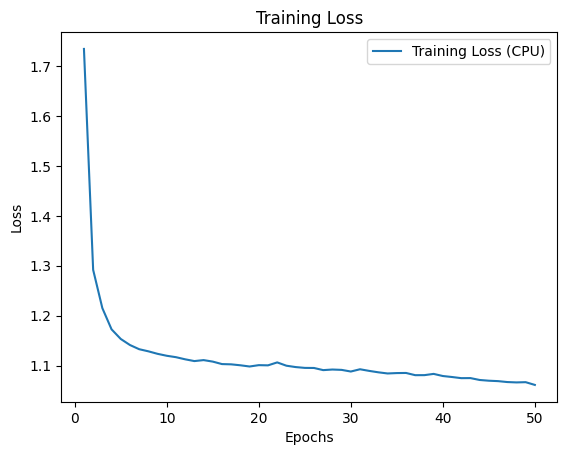

In [27]:
# Training loop for CPU
epoch_time_cpu = []
start_time_cpu = time.time()
for epoch in range(num_epochs):
    model_cpu.train()
    running_loss = 0.0
    epoch_start_time = time.time()  # Start time for the current epoch
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_cpu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    epoch_end_time = time.time()  # End time for the current epoch
    epoch_time_cpu = epoch_end_time - epoch_start_time  # Elapsed execution time for the epoch
    train_losses_cpu.append(avg_loss)
    print(f"CPU - Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Epoch Time: {epoch_time_cpu:.2f} seconds")

end_time_cpu = time.time()
execution_time_cpu = end_time_cpu - start_time_cpu
print(f"Total execution time on CPU training: {execution_time_cpu:.2f} seconds")


# Plot the loss function
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses_cpu, label='Training Loss (CPU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Assuming X_test_tensor and y_test_tensor are PyTorch tensors
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Evaluation and Accuracy in CPU and Accuracy on Test Dataset

In [28]:
# Evaluation on CPU

time_start_cpu_test = time.time()
correct = 0
total = 0
with torch.no_grad():
    model_cpu.eval()
    for inputs, labels in test_loader:
        outputs = model_cpu(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
time_end_cpu_test = time.time()  # End time for testing on CPU
execution_time_cpu_test = time_end_cpu_test - time_start_cpu_test
print(f"Execution time on test set(CPU): {execution_time_cpu_test}")
print(f"Accuracy on test set (CPU): {accuracy:.4f}")

Execution time on test set(CPU): 0.012599945068359375
Accuracy on test set (CPU): 0.5275


GPU Availability Check

In [29]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model for GPU and move it to GPU
model_gpu = MLP(input_size, hidden_size1, hidden_size2, num_classes).to(device)
optimizer_gpu = optim.Adam(model_gpu.parameters(), lr=learning_rate)

# Lists to store the loss values for plotting
train_losses_gpu = []
epoch_time_gpu = []

# Assuming X_train_tensor and y_train_tensor are PyTorch tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


######################################
####### Training  for GPU and Evaluation ########
######################################

GPU - Epoch [1/50], Loss: 1.7451, Epoch Time: 0.10 seconds
GPU - Epoch [2/50], Loss: 1.2819, Epoch Time: 0.10 seconds
GPU - Epoch [3/50], Loss: 1.2093, Epoch Time: 0.10 seconds
GPU - Epoch [4/50], Loss: 1.1777, Epoch Time: 0.10 seconds
GPU - Epoch [5/50], Loss: 1.1584, Epoch Time: 0.09 seconds
GPU - Epoch [6/50], Loss: 1.1458, Epoch Time: 0.10 seconds
GPU - Epoch [7/50], Loss: 1.1376, Epoch Time: 0.10 seconds
GPU - Epoch [8/50], Loss: 1.1297, Epoch Time: 0.10 seconds
GPU - Epoch [9/50], Loss: 1.1222, Epoch Time: 0.10 seconds
GPU - Epoch [10/50], Loss: 1.1203, Epoch Time: 0.10 seconds
GPU - Epoch [11/50], Loss: 1.1157, Epoch Time: 0.10 seconds
GPU - Epoch [12/50], Loss: 1.1111, Epoch Time: 0.10 seconds
GPU - Epoch [13/50], Loss: 1.1063, Epoch Time: 0.10 seconds
GPU - Epoch [14/50], Loss: 1.1050, Epoch Time: 0.09 seconds
GPU - Epoch [15/50], Loss: 1.1040, Epoch Time: 0.10 seconds
GPU - Epoch [16/50], Loss: 1.1010, Epoch Time: 0.11 seconds
GPU - Epoch [17/50], Loss: 1.0984, Epoch Time: 0.

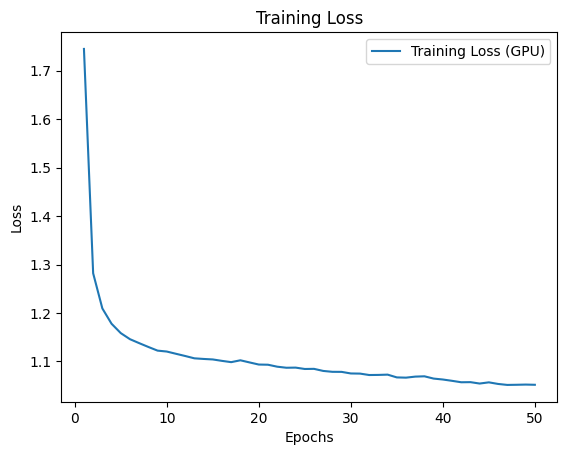

In [30]:
# Training loop for GPU
start_time_gpu = time.time()
for epoch in range(num_epochs):
    model_gpu.train()
    running_loss = 0.0
    epoch_start_time = time.time()  # Start time for the current epoch
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_gpu.zero_grad()
        outputs = model_gpu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_gpu.step()
        running_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    epoch_end_time = time.time()  # End time for the current epoch
    epoch_time_gpu = epoch_end_time - epoch_start_time  # Elapsed time for the epoch
    train_losses_gpu.append(avg_loss)
    print(f"GPU - Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Epoch Time: {epoch_time_gpu:.2f} seconds")

end_time_gpu = time.time()
execution_time_gpu = end_time_gpu - start_time_gpu
print(f"Total execution time on GPU training: {execution_time_gpu:.2f} seconds")


# Plot the loss function
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses_gpu, label='Training Loss (GPU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

Evaluation on GPU and Accuracy on test dataset

In [31]:
# Evaluation on GPU
time_gpu_test_start = time.time()
correct = 0
total = 0
with torch.no_grad():
    model_gpu.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU
        outputs = model_gpu(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
time_gpu_test_end = time.time()  # End time for testing on GPU
execution_time_gpu_test = time_gpu_test_end - time_gpu_test_start
print(f"Execution time on test set(GPU): {execution_time_gpu_test}")
print(f"Accuracy on test set (GPU): {accuracy:.4f}")


Execution time on test set(GPU): 0.014859914779663086
Accuracy on test set (GPU): 0.5350


Training Loss comparison between CPU and GPU Graph

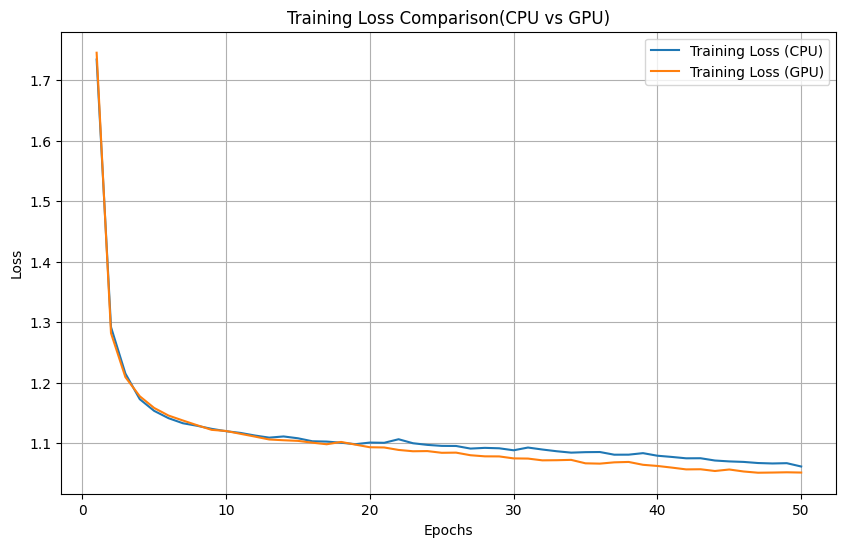

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses_cpu, label='Training Loss (CPU)')
plt.plot(range(1, num_epochs+1), train_losses_gpu, label='Training Loss (GPU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison(CPU vs GPU)')
plt.legend()
plt.grid(True)
plt.show()

Execution Time comparison in CPU and GPU

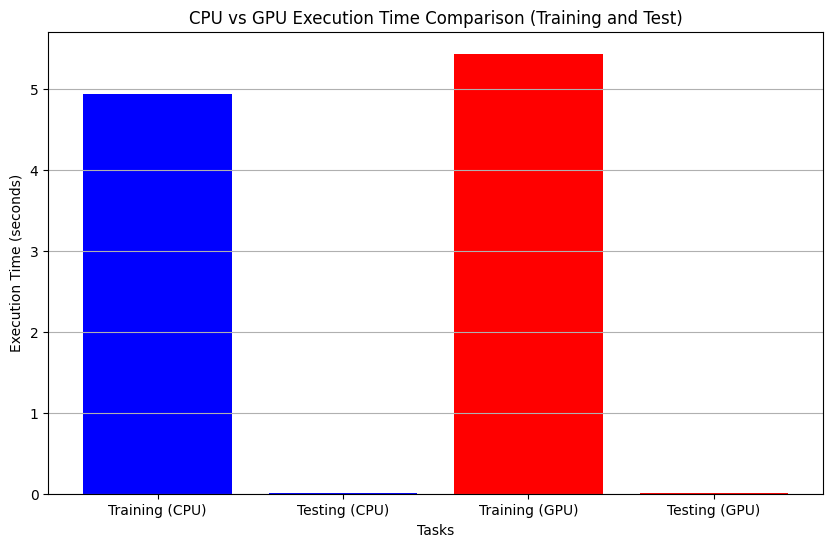

In [33]:
# Execution time taken in CPU and GPU
execution_times_cpu = [execution_time_cpu, execution_time_cpu_test]
execution_times_gpu = [execution_time_gpu, execution_time_gpu_test]

# Adding Labels
tasks = ['Training (CPU)', 'Testing (CPU)', 'Training (GPU)', 'Testing (GPU)']

# Define values
execution_times = execution_times_cpu + execution_times_gpu

# Plot in a bar
plt.figure(figsize=(10, 6))
plt.bar(tasks, execution_times, color=['blue', 'blue', 'red', 'red'])
plt.xlabel('Tasks')
plt.ylabel('Execution Time (seconds)')
plt.title('CPU vs GPU Execution Time Comparison (Training and Test)')
plt.grid(axis='y')
plt.show()